In [1]:
# math library
import numpy as np
import pandas as pd
import seaborn as sns
import random
from datetime import datetime

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

In [2]:
#filename = 'data/user_logs.csv'
#n = 392106544 - 1 #number of records in file (excludes header)
#s = 5000000 #desired sample size
#lines2skip = np.random.choice(np.arange(1,n+1), (n-s), replace=False)
#user_logs = pd.read_csv(filename, skiprows=lines2skip)

In [12]:
user_logs_sample = pd.read_csv('data/user_logs.csv', nrows=5e6)
user_logs_sample['date'] = user_logs_sample.date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN" )


Checking basic info of the dataset:

User logs: 
(5000000, 9)
                                           msno        date  num_25  num_50  \
0  rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=  2015-05-13       0       0   
1  rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=  2015-07-09       9       1   
2  yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=  2015-01-05       3       3   
3  yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=  2015-03-06       1       0   
4  yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=  2015-05-01       3       0   

   num_75  num_985  num_100  num_unq  total_secs  
0       0        0        1        1     280.335  
1       0        0        7       11    1658.948  
2       0        0       68       36   17364.956  
3       1        1       97       27   24667.317  
4       0        0       38       38    9649.029  


In the 5000000 log rows, there are  1015744 members
There are on average  4.922500157520005 logs per user


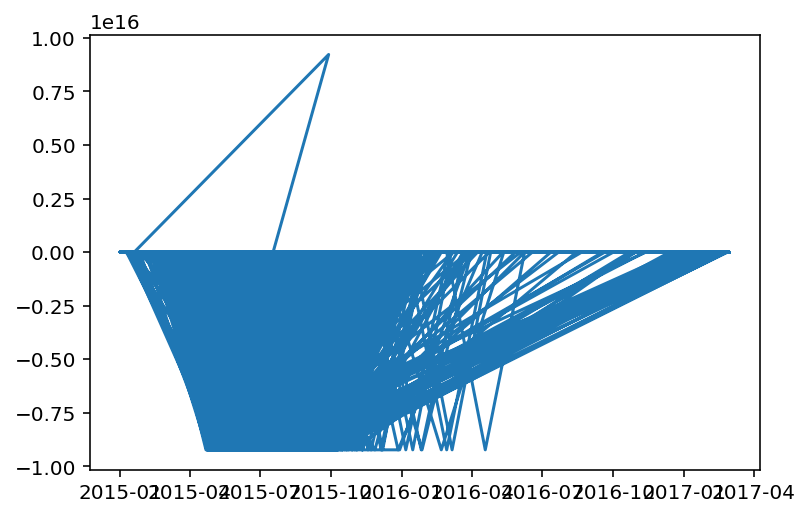

In [13]:
print ('User logs: ')
print(user_logs_sample.shape)
print(user_logs_sample.head())
print('\n')
print("In the" , user_logs_sample.shape[0], "log rows, there are ", len(set(user_logs_sample['msno'])) ,"members")
print('There are on average ' ,user_logs_sample.shape[0]/len(set(user_logs_sample['msno'])), 'logs per user')
plt.plot(user_logs_sample['date'],user_logs_sample['total_secs'])

In [14]:
outlier_count = user_logs_sample['msno'][user_logs_sample['total_secs']<0].count()
print('There are', outlier_count, '<0sec outliers, which will be removed from the dataset')
outlier_count = user_logs_sample['msno'][user_logs_sample['total_secs']>86400].count()
print('There are', outlier_count, '>1day outliers, which will be removed from the dataset')
user_logs_sample = user_logs_sample[user_logs_sample['total_secs'] >= 0]
user_logs_sample = user_logs_sample[user_logs_sample['total_secs'] <86400]
user_logs_sample.describe()

# TO FIND OUT: does negative seconds mean the whole datapoint is incorrect?

There are 820 <0sec outliers, which will be removed from the dataset
There are 1802 >1day outliers, which will be removed from the dataset


,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,4.997377e+06,4.997377e+06,4.997377e+06,4.997377e+06,4.997377e+06,4.997377e+06,4.997377e+06
mean,6.498122e+00,1.639449e+00,1.014793e+00,1.126968e+00,3.056570e+01,3.005571e+01,8.082929e+03
std,1.404301e+01,4.249933e+00,2.130048e+00,2.973843e+00,3.969013e+01,3.355817e+01,9.711287e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.892542e+03
50%,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.626733e+03
75%,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.800000e+01,4.000000e+01,1.025990e+04
max,2.515000e+03,7.550000e+02,3.610000e+02,1.515000e+03,3.719000e+03,2.027000e+03,8.639972e+04


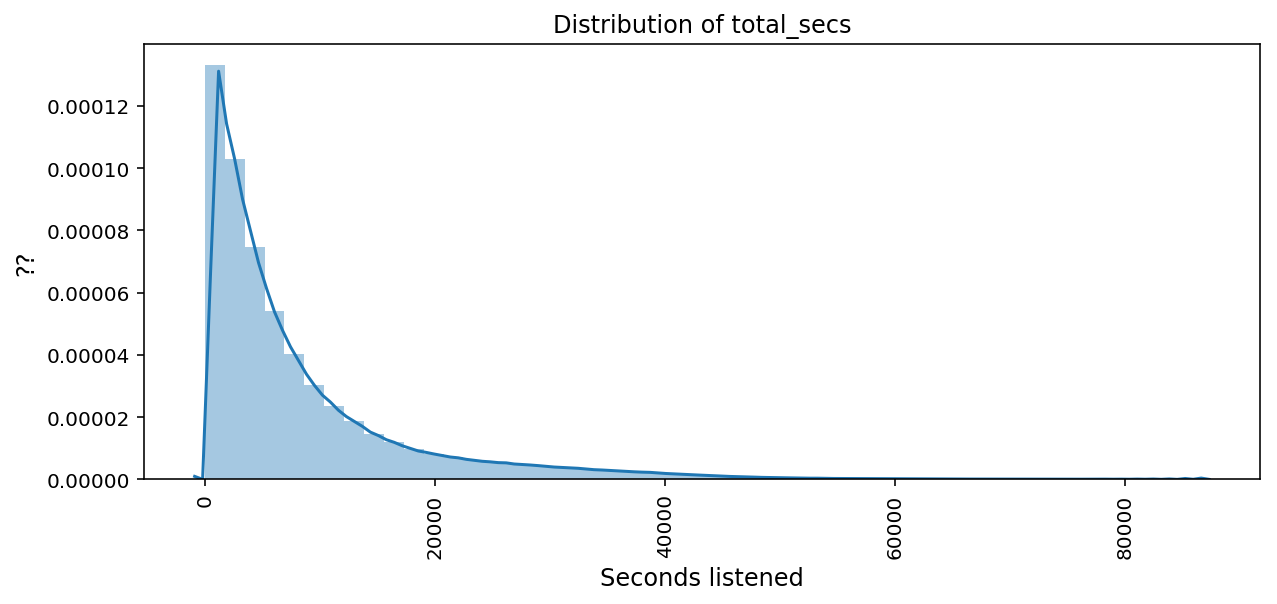

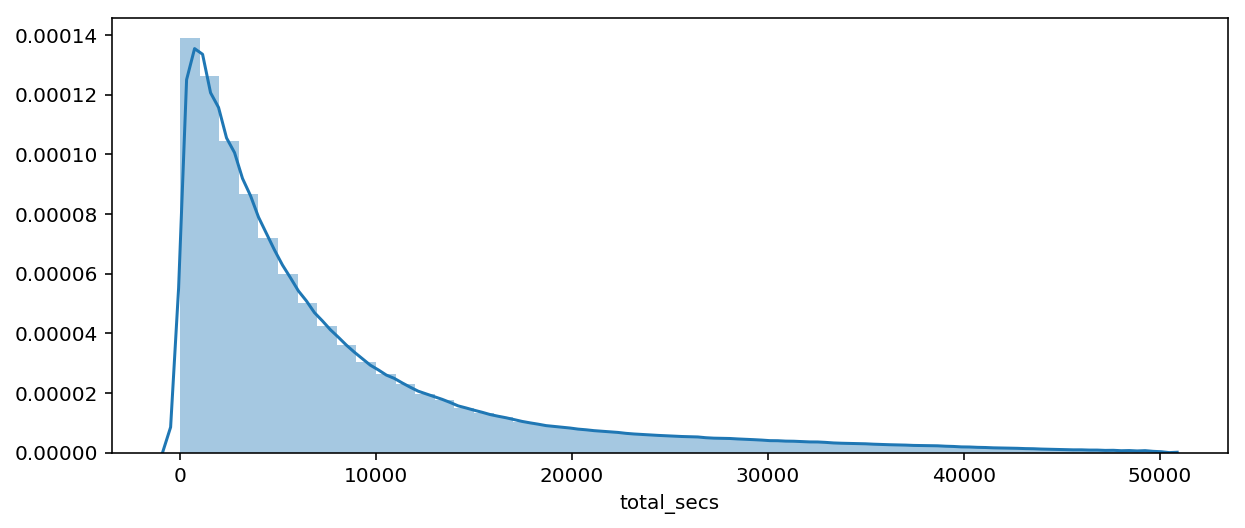

In [15]:
plt.figure(1,[10,4])
total_secs = user_logs_sample['total_secs']
#fig = sns.kdeplot(total_secs, cut =0, clip=(0,50000))
#plt.xlim(0, 100000)
sns.distplot(total_secs)
plt.ylabel('??', fontsize=12)
plt.xlabel('Seconds listened', fontsize=12)
plt.xticks(rotation='vertical')
#plt.xticks([20000,40000])
plt.title("Distribution of total_secs", fontsize=12)
plt.show()

plt.figure(2,[10,4])
total_secs_plt = user_logs_sample[user_logs_sample.total_secs<50000]
total_secs_2 = total_secs_plt['total_secs']
sns.distplot(total_secs_2)
plt.show()


range(0, 5)


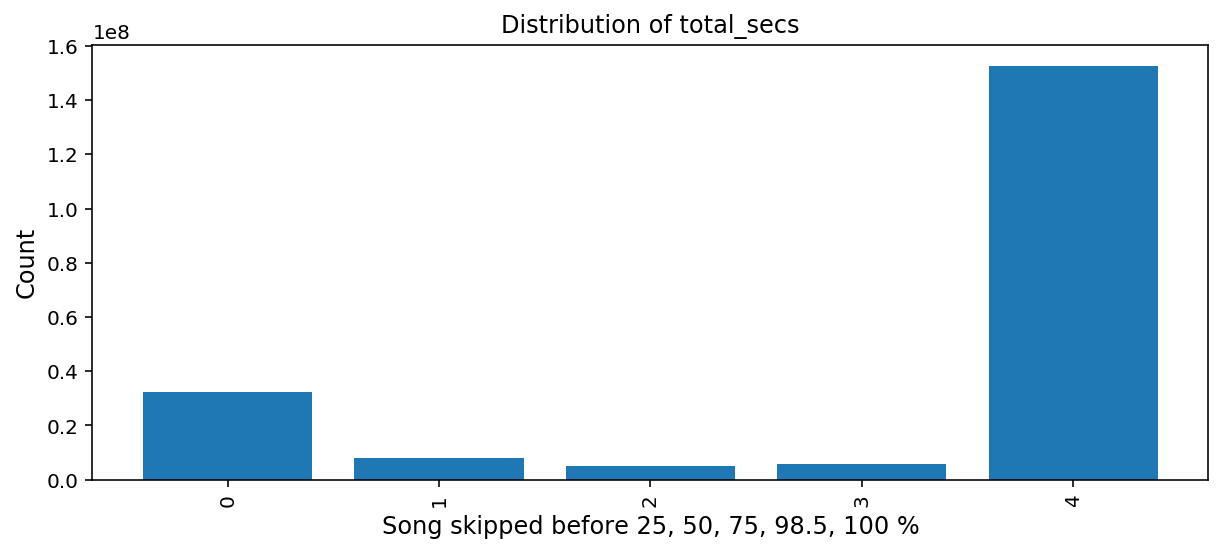

In [16]:
plt.figure(3,[10,4])
num_25 = user_logs_sample['num_25']
num_25_count = sum(num_25)
#print(num_25)
num_50 = user_logs_sample['num_50']
num_50_count = sum(num_50)
num_75 = user_logs_sample['num_75']
num_75_count = sum(num_75)
num_985 = user_logs_sample['num_985']
num_985_count = sum(num_985)
num_100 = user_logs_sample['num_100']
num_100_count = sum(num_100)

num_count = np.array([num_25_count, num_50_count, num_75_count, num_985_count, num_100_count])
x = range(len(num_count))
print(x)
plt.bar(x, num_count)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Song skipped before 25, 50, 75, 98.5, 100 %', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribution of total_secs", fontsize=12)
plt.show()


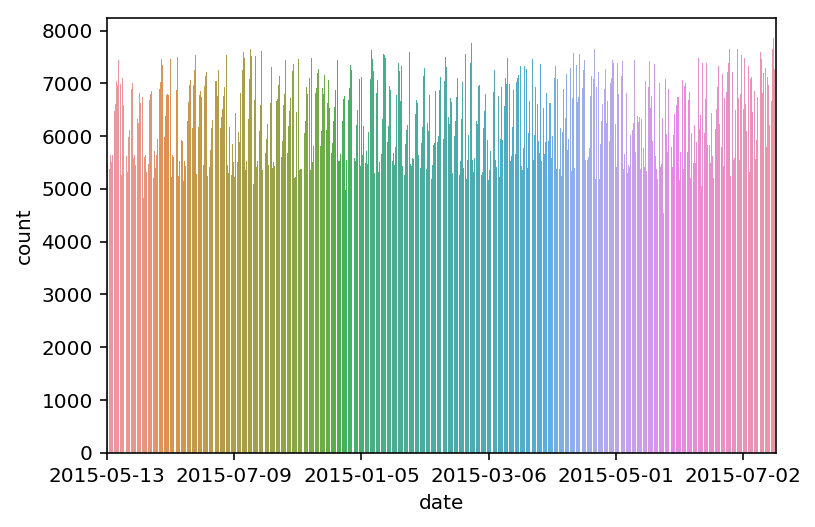

This shows that by taking only the first x rows from the user_logs file, we limit ourselves to earlier dates


In [17]:
date = user_logs_sample['date']
#print(date)
fig, ax = plt.subplots(1,1)
sns.countplot(x=date, data=user_logs_sample)
ax.set_xticks(ax.get_xticks()[::150])
plt.show()
print('This shows that by taking only the first x rows from the user_logs file, we limit ourselves to earlier dates')

TypeError: must be str, not float

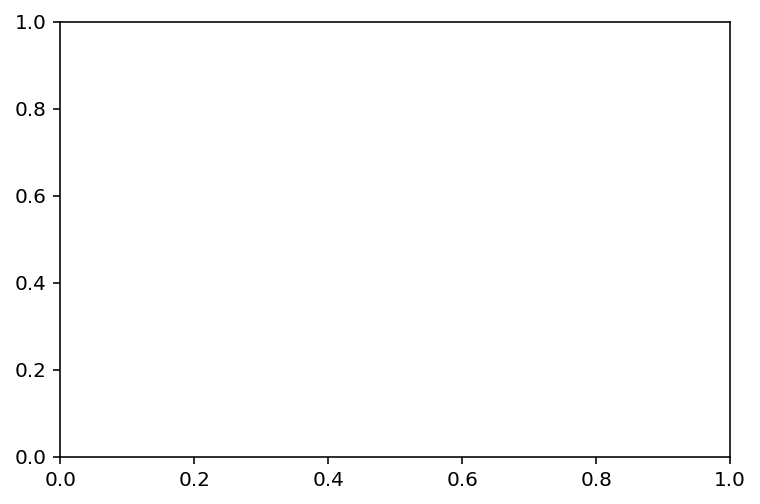

In [66]:
date2 = user_logs_sample['date']
#print(date)
sns.distplot(user_logs_sample)
#ax.set_xticks(ax.get_xticks()[::150])
plt.show()
print('This shows that by taking only the first x rows from the user_logs file, we limit ourselves to earlier dates')

In [ ]:
import 

[-0.03882183  1.87700117  0.67487218 -0.45093686  0.28204733  0.28013764
  0.71443574  0.26441649  0.62535078  0.09244624  0.27230304  1.57805496
  0.28448232 -0.04969617  0.27289946  0.75310094 -1.53626918 -0.71233277
  0.76083299  0.48361763 -1.1729953  -0.95544151 -0.21924275 -0.57729289
 -0.58331618 -0.06501308  0.94547903 -1.14602714  0.24288053 -0.41210737
  0.92156177 -0.76507549 -0.23835448  0.79627362  0.02835698 -2.62797694
  1.83639507 -1.04539996  0.08970212 -0.63782872  0.28164214  0.56970721
  0.16094044 -0.01549837  1.85035331 -0.74284615  1.88462706 -0.25292858
 -1.35929311 -0.12804375 -1.06053911  0.44489681  0.00584932  0.0743403
 -0.23991142 -1.10370424  0.14544106  1.4859569   0.40563406 -1.11213762
  1.58091803 -1.21102262  1.32045875  2.24752014 -0.29594907  1.90561577
  2.64632367 -1.07738298 -0.06404785  0.1179897  -1.33487588 -1.31777446
  1.07945839  0.6192473  -0.29180546  0.12703279  1.40160877  0.85592871
  0.79152629  0.29001025 -0.16504322  0.4988988  -0.

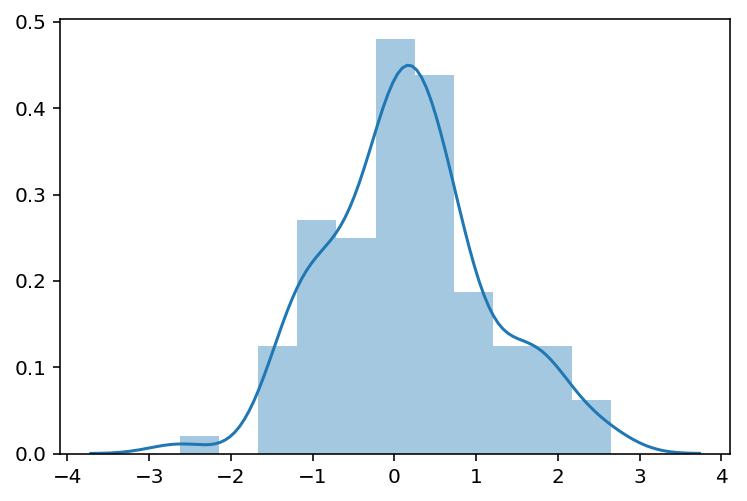

In [47]:
x = np.random.normal(size=100)
print(x)
sns.distplot(x);


NameError: name 'date' is not defined

In [ ]:
print('\n')
print('INFO:')
print(user_logs_sample.info())
print('\n')
print('DESCRIBE:')
print(user_logs_sample.describe())

From the above observations we have the following obvious outliers that need to be removed from the data :
- negative seconds